In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor


In [2]:

def chargerData(path):
    data = pd.read_csv(path)
    return data
data1 = chargerData('Dataset2.csv')

In [3]:
attr_data = data1
attr_data.head()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6


# traitement des valeurs manquantes

In [4]:
attr_data = data1.copy(deep=True)
attr_data['Start date'] = pd.to_datetime(attr_data['Start date'], format='%m/%d/%Y', errors='coerce')
attr_data['Start date'] = attr_data['Start date'].combine_first(pd.to_datetime(attr_data['Start date'], format='%d-%b', errors='coerce'))

In [5]:
min_periods_start = attr_data.groupby(attr_data['Start date'].dt.year)['time_period'].min()
max_periods_start = attr_data.groupby(attr_data['Start date'].dt.year)['time_period'].max()
max_periods_start = max_periods_start.drop(2019)
min_periods_start = min_periods_start.drop(2019)

print(min_periods_start)
print(max_periods_start)

Start date
2020.0    19
2021.0    36
2022.0    54
Name: time_period, dtype: int64
Start date
2020.0     35
2021.0     53
2022.0    155
Name: time_period, dtype: int64


In [6]:
attr_data['end date'] = pd.to_datetime(attr_data['end date'], format='%m/%d/%Y', errors='coerce')
attr_data['end date'] = attr_data['end date'].combine_first(pd.to_datetime(attr_data['end date'], format='%d-%b', errors='coerce'))

#for end date
min_periods_end = attr_data.groupby(attr_data['end date'].dt.year)['time_period'].min()
max_periods_end = attr_data.groupby(attr_data['end date'].dt.year)['time_period'].max()
print(min_periods_end)
print(max_periods_end)

end date
2020.0    18
2021.0    35
2022.0    53
Name: time_period, dtype: int64
end date
2020.0     34
2021.0     52
2022.0    155
Name: time_period, dtype: int64


In [7]:
df = data1.copy(deep=True)

In [8]:
def fix_date(data, date_col_name, period_col_name, year_info_min, year_info_max):
    for i, x in enumerate(data[date_col_name]):
        try:
            data.at[i, date_col_name] = pd.to_datetime(x, format='%m/%d/%Y')
        except ValueError:
            if len(x) != 0:
                for y in year_info_min.keys():
                    if data.at[i, period_col_name] >= year_info_min[y] and data.at[i, period_col_name] <= year_info_max[y]:
                        data.at[i, date_col_name] = pd.to_datetime(f"{x}-{int(y)}", format='%d-%b-%Y')
            else:
                for y in year_info_min.keys():
                    if data.at[i, period_col_name] >= year_info_min[y] and data.at[i, period_col_name] <= year_info_max[y]:
                        data.at[i, date_col_name] = pd.to_datetime(y, format='%Y')

fix_date(df, 'Start date', 'time_period', min_periods_start, max_periods_start)
fix_date(df,'end date','time_period',min_periods_end, max_periods_end)
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11 00:00:00,2020-10-31 00:00:00,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30 00:00:00,2021-06-19 00:00:00,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28 00:00:00,2021-04-17 00:00:00,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06 00:00:00,2022-02-26 00:00:00,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20 00:00:00,2021-07-10 00:00:00,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01 00:00:00,2022-05-21 00:00:00,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24 00:00:00,2022-08-13 00:00:00,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12 00:00:00,2022-07-02 00:00:00,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28 00:00:00,2020-07-18 00:00:00,53.0,1379.0,61.0,10.9,282.8,4.4


In [9]:
def replace_missing_values(data, col_name):
    data[col_name] = data[col_name].fillna(data[col_name].mean())
    return data
df= replace_missing_values(df, 'case count')
df = replace_missing_values(df, 'test count')
df = replace_missing_values(df, 'positive tests')
df = replace_missing_values(df, 'case rate')
df = replace_missing_values(df, 'test rate')
df = replace_missing_values(df, 'positivity rate')
df


,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11 00:00:00,2020-10-31 00:00:00,22.000000,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30 00:00:00,2021-06-19 00:00:00,225.987138,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28 00:00:00,2021-04-17 00:00:00,34.000000,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06 00:00:00,2022-02-26 00:00:00,110.000000,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20 00:00:00,2021-07-10 00:00:00,14.000000,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01 00:00:00,2022-05-21 00:00:00,165.000000,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24 00:00:00,2022-08-13 00:00:00,150.000000,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12 00:00:00,2022-07-02 00:00:00,219.000000,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28 00:00:00,2020-07-18 00:00:00,53.000000,1379.0,61.0,10.9,282.8,4.4


# traitement des valeurs abbérantes

In [10]:
def mediane(data):
    sortedData = np.sort(data)
    middle_elements = 0
    if len(sortedData) %2 == 0:
        middle_elements = sortedData[int(len(sortedData) / 2) - 1 : int(len(sortedData) / 2) + 1]
        middle_elements = (middle_elements[0]+middle_elements[1])/2
    else :
        middle_elements = sortedData[int((len(sortedData)+1) / 2)]
    return middle_elements
def quartile(data):
    # data = filter_data(data)
    q0= np.min(data)
    q2=mediane(data)
    q4 = np.max(data)
    nq1 = int(0.25 * len(data))
    nq3 = int(0.75 * len(data))
    sorted = np.sort(data)
    q1 = sorted[nq1]
    q3 = sorted[nq3]
    return q0,q1,q2,q3,q4

In [11]:
def fix_abberant_data(data, col_name):
    q0,q1,q2,q3,q4 = quartile(data[col_name])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mean = data[col_name].mean()
    for i, x in enumerate(data[col_name]):
        if x < lower_bound or x > upper_bound:
            #replace with the meanl
            # print(f"Replacing {x} with {mean},at index {i}")
            data.at[i, col_name] = mean
            

In [12]:
fix_abberant_data(df, 'case count')
fix_abberant_data(df, 'test count')
fix_abberant_data(df, 'positivity rate')
fix_abberant_data(df, 'positive tests')
fix_abberant_data(df, 'case rate')
fix_abberant_data(df, 'test rate')


In [13]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11 00:00:00,2020-10-31 00:00:00,22.000000,2543.0,23.0,2.600000,304.700000,0.900000
1,95129,43,39741,2021-05-30 00:00:00,2021-06-19 00:00:00,225.987138,3315.0,14.0,1.100000,397.200000,0.400000
2,95129,40,39741,2021-03-28 00:00:00,2021-04-17 00:00:00,34.000000,4816.0,37.0,4.100000,577.100000,0.800000
3,95129,55,39741,2022-02-06 00:00:00,2022-02-26 00:00:00,110.000000,10194.0,175.0,13.200000,454.838872,1.700000
4,95129,44,39741,2021-06-20 00:00:00,2021-07-10 00:00:00,14.000000,3033.0,17.0,1.700000,363.400000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01 00:00:00,2022-05-21 00:00:00,165.000000,2315.0,192.0,33.800000,474.700000,8.300000
333,94085,63,23223,2022-07-24 00:00:00,2022-08-13 00:00:00,150.000000,1348.0,190.0,30.800000,276.400000,14.100000
334,94085,61,23223,2022-06-12 00:00:00,2022-07-02 00:00:00,219.000000,1696.0,255.0,19.390504,347.800000,5.827596
335,94085,27,23223,2020-06-28 00:00:00,2020-07-18 00:00:00,53.000000,1379.0,61.0,10.900000,282.800000,4.400000


In [14]:
data = df.copy(deep=True)

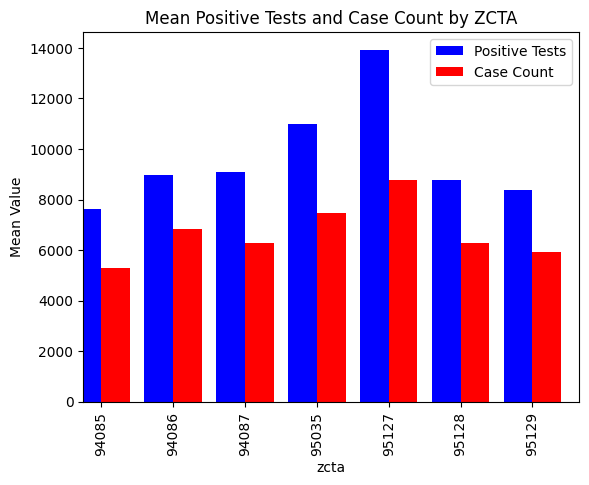

In [15]:
pr = data.groupby("zcta")['positive tests'].sum()
cc = data.groupby("zcta")['case count'].sum()

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Plot the 'positive tests' means
pr.plot(kind='bar', ax=ax, color='blue', width=0.4, position=1)

# Plot the 'case count' means
cc.plot(kind='bar', ax=ax, color='red', width=0.4, position=0)

# Set the x-label and y-label
ax.set_xlabel('zcta')
ax.set_ylabel('Mean Value')

# Set the title
ax.set_title('Mean Positive Tests and Case Count by ZCTA')

# Show the legend
ax.legend(['Positive Tests', 'Case Count'])

# Show the plot
plt.show()

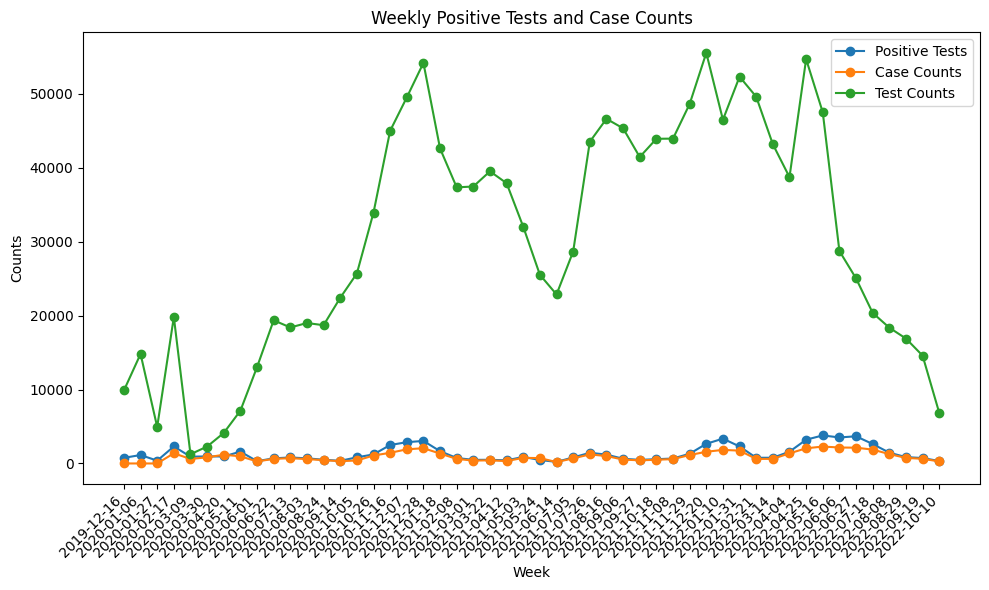

In [16]:

data = df.copy(deep=True)
# data.set_index('Start date', inplace=True)
data['Start date'] = pd.to_datetime(data['Start date'],errors='coerce')
# Convert 'Date' to datetime if it's not already
# data['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' to weekly frequency
data['Start date'] = data['Start date'].dt.to_period('W').dt.to_timestamp()
# Group by 'Week' and aggregate sum
weekly_data = data.groupby('Start date').agg({'positive tests': 'sum', 'case count': 'sum','test count':'sum'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Positive Tests
ax.plot(weekly_data['Start date'], weekly_data['positive tests'], label='Positive Tests', marker='o')

# Line plot for Case Counts
ax.plot(weekly_data['Start date'], weekly_data['case count'], label='Case Counts', marker='o')
ax.plot(weekly_data['Start date'], weekly_data['test count'], label='Test Counts', marker='o')

# X-axis labels and title
ax.set_xticks(weekly_data['Start date'])
ax.set_xticklabels(weekly_data['Start date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_xlabel('Week')
ax.set_ylabel('Counts')
ax.set_title('Weekly Positive Tests and Case Counts')

# Legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

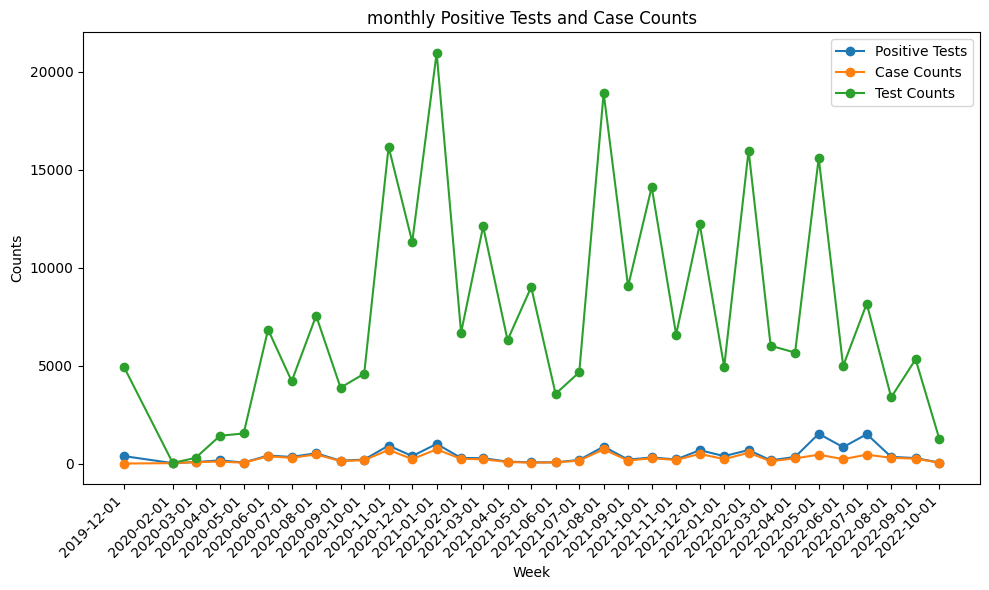

In [17]:
data = df.copy(deep=True)
# data.set_index('Start date', inplace=True)
data['Start date'] = pd.to_datetime(data['Start date'],errors='coerce')
# Convert 'Date' to datetime if it's not already
# data['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' to weekly frequency
data['Start date'] = data['Start date'].dt.to_period('M').dt.to_timestamp()

data = data[data['zcta'] == 95127]
# Group by 'Week' and aggregate sum
monthly_data = data.groupby('Start date').agg({'positive tests': 'sum', 'case count':'sum','test count':'sum'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Positive Tests
ax.plot(monthly_data['Start date'], monthly_data['positive tests'], label='Positive Tests', marker='o')

# Line plot for Case Counts
ax.plot(monthly_data['Start date'], monthly_data['case count'], label='Case Counts', marker='o')
ax.plot(monthly_data['Start date'], monthly_data['test count'], label='Test Counts', marker='o')

# X-axis labels and title
ax.set_xticks(monthly_data['Start date'])
ax.set_xticklabels(monthly_data['Start date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_xlabel('Week')
ax.set_ylabel('Counts')
ax.set_title('monthly Positive Tests and Case Counts')

# Legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

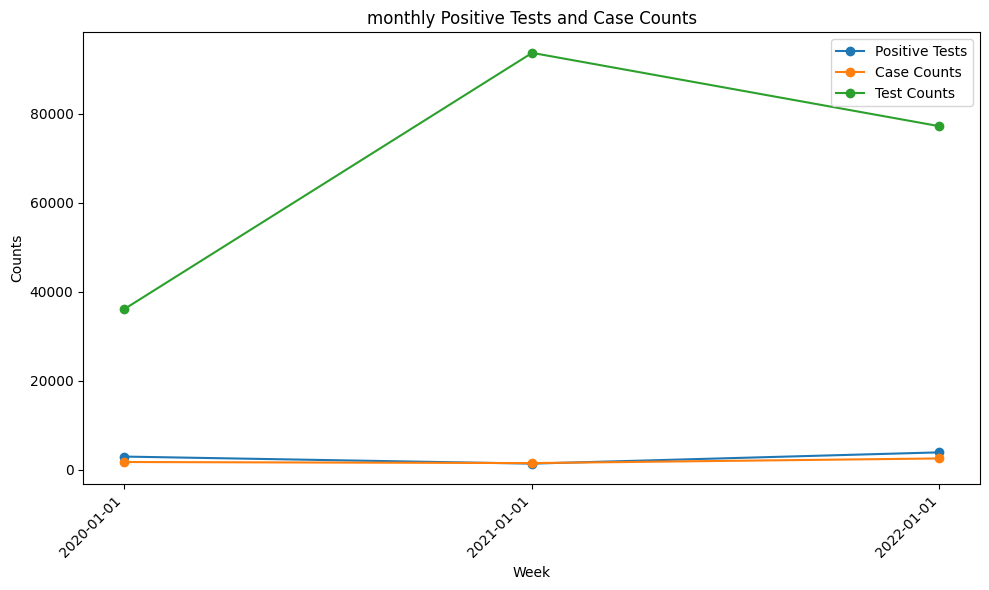

In [18]:
data = df.copy(deep=True)
# data.set_index('Start date', inplace=True)
data['Start date'] = pd.to_datetime(data['Start date'],errors='coerce')
# Convert 'Date' to datetime if it's not already
# data['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' to weekly frequency
data['Start date'] = data['Start date'].dt.to_period('y').dt.to_timestamp()
#choisir la zone
data = data[data['zcta'] == 95129]

# Group by 'Week' and aggregate sum
monthly_data = data.groupby('Start date').agg({'positive tests': 'sum', 'case count':'sum','test count':'sum'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Positive Tests
ax.plot(monthly_data['Start date'], monthly_data['positive tests'], label='Positive Tests', marker='o')

# Line plot for Case Counts
ax.plot(monthly_data['Start date'], monthly_data['case count'], label='Case Counts', marker='o')
ax.plot(monthly_data['Start date'], monthly_data['test count'], label='Test Counts', marker='o')

# X-axis labels and title
ax.set_xticks(monthly_data['Start date'])
ax.set_xticklabels(monthly_data['Start date'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_xlabel('Week')
ax.set_ylabel('Counts')
ax.set_title('monthly Positive Tests and Case Counts')

# Legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

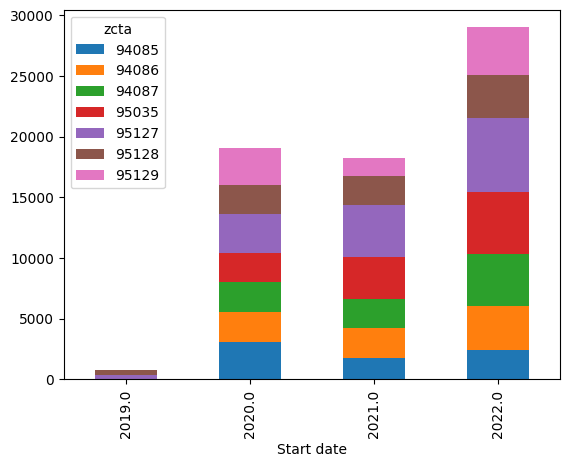

In [19]:
data= df.copy(deep=True)
#groupe the start date by year
data['Start date'] = pd.to_datetime(data['Start date'],errors='coerce')
data['Start date'] = data['Start date'].dt.to_period('Y').dt.to_timestamp().dt.year

# Create a pivot table

pivot = data.pivot_table(values='positive tests', index='Start date', columns='zcta', aggfunc='sum')

# Plot the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True)

# Show the plot
plt.show()


<Axes: xlabel='population'>

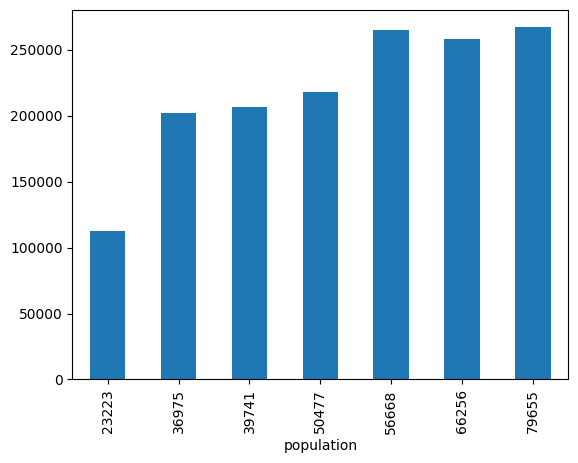

In [20]:
#line chart between population and test count
data = df.copy(deep=True)
#group by population
tests = data.groupby('population')['test count'].sum()
# pr.plot(kind='bar', ax=ax, color='blue', width=0.4, position=1)
tests.plot(kind='bar')

In [21]:
data = df.copy(deep=True)
res = data.groupby('zcta')['positive tests'].sum()
res.sort_values()
res[:5]

/tmp/ipykernel_17925/1984883584.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  res[:5]


zcta
94085     7614.770968
94086     8961.377419
94087     9106.377419
95035    10992.377419
95127    13934.180645
Name: positive tests, dtype: float64

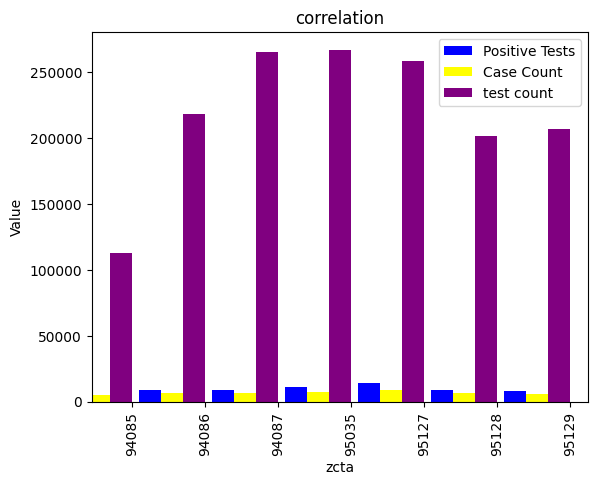

In [45]:
data = df.copy(deep=True)
pt = data.groupby('zcta')['positive tests'].sum()
cc = data.groupby('zcta')['case count'].sum()
tc = data.groupby('zcta')['test count'].sum()
#scatter plot
fig, ax = plt.subplots()

# Plot the 'positive tests' means
pt.plot(kind='bar', ax=ax,color='blue',  width=0.3, position=3)
# Plot the 'case count' means
cc.plot(kind='bar', ax=ax,color='yellow',  width=0.3, position=2)
tc.plot(kind='bar', ax=ax,color='purple' , width=0.3, position=1)


# Set the x-label and y-label
ax.set_xlabel('zcta')
ax.set_ylabel('Value')

# Set the title
ax.set_title('correlation')

# Show the legend
ax.legend(['Positive Tests', 'Case Count','test count'])

# Show the plot
plt.show(['positive tests', 'case count', 'test count'])


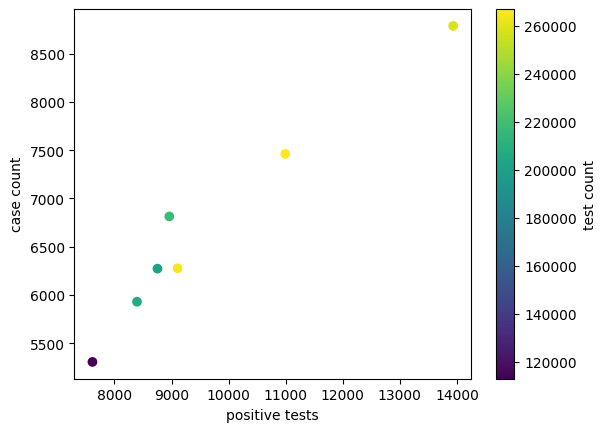

In [29]:
#get the time period

tmp = data[data['time_period'] >0]
# Create a new DataFrame with 'time_period' and 'zcta' as the index and 'positive tests', 'case count', and 'test count' as the columns
data_grouped = tmp.groupby('zcta')[['positive tests', 'case count', 'test count']].sum().reset_index()
#three bars  plot for every attributes
